In [2]:
#importing necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
lemmatizer = nltk.WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
stop_words = stopwords.words('english')

In [3]:
#loading the dataset, and displaying to see the columns and their contents
df = pd.read_csv('data.csv', sep = "\t")
df

,handle,text,date
0,realDonaldTrump,In the last 24 hrs. we have raised over $13M f...,2016-09-27
1,HillaryClinton,We don’t want to turn against each other.\nWe ...,2016-09-27
2,realDonaldTrump,"Well, now they're saying that I not only won t...",2016-09-27
3,realDonaldTrump,Hillary's been failing for 30 years in not get...,2016-09-27
4,realDonaldTrump,The #1 trend on Twitter right now is #TrumpWon...,2016-09-27
...,...,...,...
1394,realDonaldTrump,"Can you believe that Ted Cruz, who has been ki...",2016-04-01
1395,realDonaldTrump,"For the 1st time in American history, America’...",2016-04-01
1396,realDonaldTrump,The National Border Patrol Council (NBPC) said...,2016-04-01
1397,realDonaldTrump,The Club For Growth said in their ad that 465 ...,2016-04-01


In [4]:
#converting the date into months for further steps
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df      

,handle,text,date,month
0,realDonaldTrump,In the last 24 hrs. we have raised over $13M f...,2016-09-27,9
1,HillaryClinton,We don’t want to turn against each other.\nWe ...,2016-09-27,9
2,realDonaldTrump,"Well, now they're saying that I not only won t...",2016-09-27,9
3,realDonaldTrump,Hillary's been failing for 30 years in not get...,2016-09-27,9
4,realDonaldTrump,The #1 trend on Twitter right now is #TrumpWon...,2016-09-27,9
...,...,...,...,...
1394,realDonaldTrump,"Can you believe that Ted Cruz, who has been ki...",2016-04-01,4
1395,realDonaldTrump,"For the 1st time in American history, America’...",2016-04-01,4
1396,realDonaldTrump,The National Border Patrol Council (NBPC) said...,2016-04-01,4
1397,realDonaldTrump,The Club For Growth said in their ad that 465 ...,2016-04-01,4


In [5]:
#converting pos-tags for better lemmatization
from nltk.corpus import wordnet
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [6]:
#defining a function for preprocessing steps
def preprocess_text(text):
    #removing '&amp;' from the tweets, it appears repeatedly in tweets.
    text_pretokens = text.replace('&amp;', '')
    #tokenizing the texts
    text_tokens = word_tokenize(text_pretokens)
    #tagging the tokens
    text_pos = nltk.pos_tag(text_tokens)
    #removing non-alphabetical or non-numerical values
    text_words = [(token, tag) for (token, tag) in text_pos if token.isalnum()]
    #lemmatization steps and using previously defined function for better lemmatization results
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for (word, tag) in text_words]
    #putting lemmas in lowercase
    lemmatized_tokens = [lemma.lower() for lemma in lemmatized_tokens]
    return ' '.join(lemmatized_tokens)

In [7]:
#creating a new column called 'cleaned_text'
cleaned_text = [preprocess_text(t) for t in df['text']]
df['cleaned_text'] = cleaned_text
df

,handle,text,date,month,cleaned_text
0,realDonaldTrump,In the last 24 hrs. we have raised over $13M f...,2016-09-27,9,in the last 24 hr we have raise over 13m from ...
1,HillaryClinton,We don’t want to turn against each other.\nWe ...,2016-09-27,9,we don t want to turn against each other we wa...
2,realDonaldTrump,"Well, now they're saying that I not only won t...",2016-09-27,9,well now they say that i not only win the nbc ...
3,realDonaldTrump,Hillary's been failing for 30 years in not get...,2016-09-27,9,hillary be fail for 30 year in not get the job...
4,realDonaldTrump,The #1 trend on Twitter right now is #TrumpWon...,2016-09-27,9,the 1 trend on twitter right now be trumpwon t...
...,...,...,...,...,...
1394,realDonaldTrump,"Can you believe that Ted Cruz, who has been ki...",2016-04-01,4,can you believe that ted cruz who have be kill...
1395,realDonaldTrump,"For the 1st time in American history, America’...",2016-04-01,4,for the 1st time in american history america s...
1396,realDonaldTrump,The National Border Patrol Council (NBPC) said...,2016-04-01,4,the national border patrol council nbpc say th...
1397,realDonaldTrump,The Club For Growth said in their ad that 465 ...,2016-04-01,4,the club for growth say in their ad that 465 d...


In [8]:
#in order to understand the characteristics of the dataset, the first comparison is the number of total tweets
#this would help in regards to how the approach of each analysis can change and how the ploting of the outcome can be made
# counting tweets for 'realDonaldTrump' and 'HillaryClinton'
trump_tweets = (df['handle'] == 'realDonaldTrump').sum()
clinton_tweets = (df['handle'] == 'HillaryClinton').sum()

print(f"Total number of Trump tweets: {trump_tweets}")
print(f"Total number of Clinton tweets: {clinton_tweets}")

Total number of Trump tweets: 909
Total number of Clinton tweets: 490


In [10]:
#defining a function that would return a dictionary that includes the months and number of tweets in those months for the specified candidate
def tweets_per_month(handle_name):
    tweet_counts_per_month = {"month": [], "n_tweet": []}
    for month, month_data in df.groupby('month'):
        for handle, handle_data in month_data.groupby('handle'):
            if handle == handle_name:
                #counting the number of tweets for the handle in that month
                n_tweet = len(handle_data)
                #appending the relevant information to relevant parts of our dictionary
                tweet_counts_per_month['month'].append(month) 
                tweet_counts_per_month['n_tweet'].append(n_tweet)
    return tweet_counts_per_month

In [11]:
#calculating the tweets per month for each candidate
tweet_month_clinton = tweets_per_month("HillaryClinton")
tweet_month_trump = tweets_per_month("realDonaldTrump")

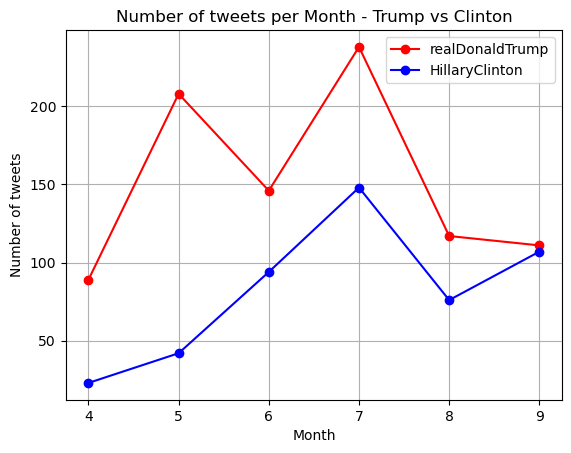

In [12]:
#plotting the two dictionaries to see the difference in time and tweet frequency of each candidate
plt.plot(tweet_month_trump['month'], tweet_month_trump['n_tweet'],label='realDonaldTrump', color='r', marker = 'o')
plt.plot(tweet_month_clinton['month'], tweet_month_clinton['n_tweet'],label='HillaryClinton', color='b', marker = 'o')

plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per Month - Trump vs Clinton')

plt.grid(True)
plt.legend()
plt.savefig('number_of_tweets.png')
plt.show()

## Average Number of Words in Tweets Over Time

In [13]:
#defining a function for calculating the average number of words in tweets over months per individual candidate
def avg_tweet_length(handle_name):
    month_handle = {"month":[],"avg_length":[]}
    for month, month_data in df.groupby('month'):
        for handle, handle_data in month_data.groupby('handle'):
            #joining each tweet to a list
            handle_data_text = ' '.join(handle_data['text'].tolist())
            #dividing the number of words by number of tweets to get the average word count per tweet
            avg_length = len(handle_data_text.split()) / len(handle_data) 
            if handle == handle_name:
                month_handle['month'].append(month)
                month_handle['avg_length'].append(avg_length)
    return month_handle

In [14]:
#average tweet length for Donald Trump for each month
month_trump_tweet_length = avg_tweet_length('realDonaldTrump')
month_trump_tweet_length

{'month': [4, 5, 6, 7, 8, 9],
 'avg_length': [20.89887640449438,
  21.192307692307693,
  21.13013698630137,
  21.710084033613445,
  20.29059829059829,
  19.34234234234234]}

In [15]:
#calculating the overall average 
avg_trump_tweet_length = sum(month_trump_tweet_length['avg_length']) / len(month_trump_tweet_length['avg_length'])
print(avg_trump_tweet_length)

20.760724291609588


In [16]:
#average tweet length for Hillary Clinton for each month
month_clinton_tweet_length = avg_tweet_length('HillaryClinton')
month_clinton_tweet_length

{'month': [4, 5, 6, 7, 8, 9],
 'avg_length': [20.956521739130434,
  20.61904761904762,
  21.617021276595743,
  20.445945945945947,
  20.86842105263158,
  21.794392523364486]}

In [17]:
avg_clinton_tweet_length = sum(month_clinton_tweet_length['avg_length']) / len(month_clinton_tweet_length['avg_length'])
print(avg_clinton_tweet_length)

21.050225026119303


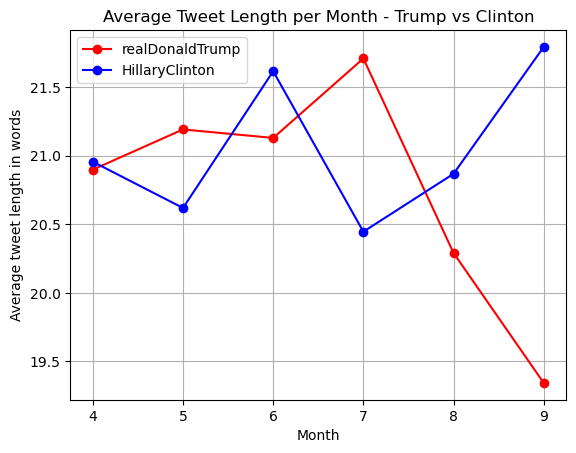

In [42]:
#plotting two dictonaries to see the comparison of average tweet length by candidates over the months
plt.plot(month_trump_tweet_length['month'], month_trump_tweet_length['avg_length'],label='realDonaldTrump', color='r', marker='o')
plt.plot(month_clinton_tweet_length['month'], month_clinton_tweet_length['avg_length'],label='HillaryClinton', color='b', marker='o')

plt.xlabel('Month')
plt.ylabel('Average tweet length in words')
plt.title('Average Tweet Length per Month - Trump vs Clinton')

plt.grid(True)
plt.legend()
plt.savefig('average_tweet_length.png')
plt.show()

## TTR

In [18]:
#a function for calculating the average type-token ratio of tweets over months and per individual candidate.
def calculate_ttr(text):
    tokens = word_tokenize(text)
    #calculating the number of tokens
    total_words = len(tokens)
    #turning the tokens into a set to get the unique tokens
    unique_words = len(set(tokens))
    #returning their ratio (ttr)
    return unique_words / total_words 

# applying the ttr calculating function to 'cleaned_text' where preprocessing was done. 
df['ttr'] = df['cleaned_text'].apply(calculate_ttr)


# grouping by month and handle 
grouped = df.groupby(['handle', 'month'])
#calculating average TTR for each month and each candidate
avg_ttr_per_handle_month = grouped['ttr'].mean()

In [20]:
print(avg_ttr_per_handle_month)

handle           month
HillaryClinton   4        0.918624
                 5        0.911581
                 6        0.903792
                 7        0.905591
                 8        0.906239
                 9        0.915709
realDonaldTrump  4        0.925465
                 5        0.928739
                 6        0.920817
                 7        0.923024
                 8        0.929944
                 9        0.944203
Name: ttr, dtype: float64


In [19]:
overall_avg_ttr_per_handle = avg_ttr_per_handle_month.groupby('handle').mean()
print(overall_avg_ttr_per_handle)

handle
HillaryClinton     0.910256
realDonaldTrump    0.928699
Name: ttr, dtype: float64


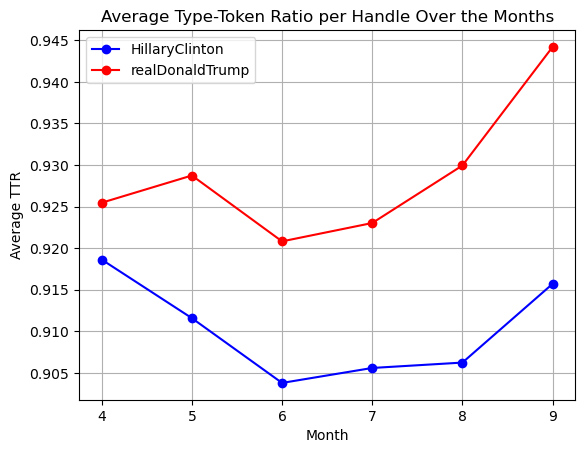

In [45]:
#giving labels and assigning colors for plotting
for handle, data in avg_ttr_per_handle_month.groupby('handle'):
    color = 'red' if handle == 'realDonaldTrump' else 'blue'
    plt.plot(data.index.get_level_values('month'), data.values, label=handle, color=color, marker='o')

plt.xlabel('Month')
plt.ylabel('Average TTR')
plt.title('Average Type-Token Ratio per Handle Over the Months')
plt.grid(True)
plt.legend()
plt.savefig('ttr.png')
plt.show()

## TF-IDF

In [21]:
#defining a function for calculating the most distinctive terms for a group of tweets over months and per individual candidate, using TF-IDF.
def distinctive_words(handle_name, topn):
    #creating an empty dictionary to store the output
    distinctive_words_by_month_handle = {}
    
    for month, month_data in df.groupby('month'):
        #creating another empty dictionary to store the most distinctive words per candidate while looping over months
        distinctive_words_by_handle = {}
        
        for handle, handle_data in month_data.groupby('handle'):
            combined_text = ' '.join(handle_data['cleaned_text'].tolist())
            # creating TF-IDF vectorizer, filtering out stop words and setting the ngram range so the output would also include bigrams
            vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
            #applying the TF-IDF vectorizer on combined text
            tfidf_matrix = vectorizer.fit_transform([combined_text])
            #getting the feature names from the vectorizer
            feature_names = np.array(vectorizer.get_feature_names_out())
            #getting the TF-IDF vector for the specified handle
            handle_tfidf_vector = tfidf_matrix[0, :]
            #sorting the feature names based on their TF-IDF values for the specified handle
            sorted_indices = np.argsort(handle_tfidf_vector.toarray()[0])[::-1]
            #extracting the topn distinctive words
            distinctive_words = feature_names[sorted_indices][:topn]
            #storing distinctive words list in the distinctive_words_by_handle dictionary while specifying the handle
            distinctive_words_by_handle[handle] = list(distinctive_words)
        #storing distinctive words dictionary in distinctive_words_by_month_handle while specifying the month of each distinctive word list 
        distinctive_words_by_month_handle[month] = distinctive_words_by_handle
    #turning it into a data frame
    most_distinct_words = pd.DataFrame(distinctive_words_by_month_handle)
    #creating an empty data frame for the specified handle
    handle_common_words = pd.DataFrame()
    #extracting words associated with the specified handle per month and adding it to the empty data frame that was created earlier
    for column in most_distinct_words.columns:
        words = most_distinct_words.loc[handle_name, column]
        handle_common_words[column] = words
        
    return handle_common_words

In [24]:
#applying the function with "HillaryClinton" handle and for 10 most distinctive words
clinton_common_words = distinctive_words("HillaryClinton", 10)
clinton_common_words

,4,5,6,7,8,9
0,family,trump,trump,trump,trump,trump
1,right,make,make,donald,donald trump,president
2,trump,donald,america,hillary,donald,say
3,woman,family,family,make,family,work
4,people,good,just,america,america,just
5,new,care,let,potus,tax,need
6,pay,work,woman,need,just,people
7,equal,donald trump,need,donald trump,work,america
8,support,pay,donald,let,doesn,country
9,need,right,donald trump,people,people,make


In [20]:
#applying the function with "realDonaldTrump" handle and for 10 most distinctive words
trump_common_words = distinctive_words("realDonaldTrump", 10)
trump_common_words

,4,5,6,7,8,9
0,great,hillary,hillary,hillary,hillary,hillary
1,cruz,crooked,clinton,crooked,great,great
2,ted,crooked hillary,crooked hillary,crooked hillary,clinton,say
3,kasich,great,crooked,clinton,say,clinton
4,delegate,say,hillary clinton,bernie,crooked,people
5,ted cruz,clinton,bad,hillary clinton,medium,enjoy
6,vote,woman,great,great,people,just
7,lyin ted,hillary clinton,just,people,hillary clinton,thank
8,lyin,thank,make,bad,cnn,foxandfriends
9,hillary,nytimes,people,just,bad,poll


## POS N-grams

In [31]:
# defining a function for identifying the most frequent part-of-speech ngrams over months and per individual candidate.
def get_pos_patterns(handle_name, ngram, n_common):
    #creating an empty dictionary to store pos ngrams for each handle and month
    pos_ngram_handle_month = {}    
    for month, month_data in df.groupby('month'):
        # reating an empty dictionary to store pos n-grams for each handle within the month
        pos_ngram_by_handle = {}
        for handle, handle_data in month_data.groupby('handle'):
            #combining the tweets per handle
            combined_text = ' '.join(handle_data['text'].tolist())
            #redoing the steps of preprocessing to ensure accurate tagging 
            text_pretokens = combined_text.replace('&amp;', '')
            text_tokens = nltk.word_tokenize(text_pretokens)
            text_pos = nltk.pos_tag(text_tokens)
            #turning tokens to lowercase after tagging
            text_words = [(token.lower(), tag) for (token, tag) in text_pos if token.isalnum()]
            #storing the tags in a list
            tags = [tag for (token, tag) in text_words]
            #creating ngrams from the tags
            pos_ngrams = nltk.ngrams(tags, ngram)
            #getting the most common n ones
            pos_ngrams_count = Counter(pos_ngrams).most_common(n_common)
            #making a list from them that only gets the ngrams and not the count of them
            pos_ngrams = [tags for tags,_ in pos_ngrams_count]
            # storing n-grams for each handle
            pos_ngram_by_handle[handle] = list(pos_ngrams)
        # storing the handle's n-grams for each month
        pos_ngram_handle_month[month] = pos_ngram_by_handle
        # turning the dictionary to a data frame
        most_common_pos_ngrams = pd.DataFrame(pos_ngram_handle_month)
    #extracting part-of-speech n-grams of the specified handle
    handle_pos_ngrams = pd.DataFrame(most_common_pos_ngrams[most_common_pos_ngrams.index==handle_name])
    #creating an empty data frame for the specified handle
    handle_common_pos_ngrams = pd.DataFrame()
    #extracting n-grams per column and storing them in the empty data frame
    for column in handle_pos_ngrams.columns:
        words = handle_pos_ngrams[column].tolist()[0]
        handle_common_pos_ngrams[column] = words

    return handle_common_pos_ngrams
    


In [32]:
#using the function to get top 3 most common trigrams for "HillaryClinton" over the months
get_pos_patterns("HillaryClinton", 2, 3)

,4,5,6,7,8,9
0,"(DT, NN)","(NNP, NNP)","(NN, NN)","(NN, IN)","(NN, IN)","(DT, NN)"
1,"(NN, NN)","(NN, NN)","(NN, IN)","(NNP, NNP)","(DT, NN)","(TO, VB)"
2,"(JJ, NN)","(JJ, NN)","(DT, NN)","(JJ, NN)","(JJ, NN)","(NN, IN)"


In [33]:
#using the function to get top 3 most common trigrams for "realDonaldTrump" over the months
get_pos_patterns("realDonaldTrump", 2, 3)

,4,5,6,7,8,9
0,"(NNP, NNP)","(NNP, NNP)","(NNP, NNP)","(NNP, NNP)","(NNP, NNP)","(NNP, NNP)"
1,"(IN, NNP)","(NN, IN)","(NN, IN)","(NN, IN)","(IN, NNP)","(NN, IN)"
2,"(NN, IN)","(DT, NN)","(JJ, NN)","(IN, NNP)","(NN, IN)","(JJ, NN)"


## I, we, them

In [35]:
#defining pronoun lists for the use of we, I, and they
we_list = ["we", "us", "our"]
i_list = ["i", "my", "me"]
they_list = ["they", "them", "their"]

In [36]:
#defining a function that would calculate the count of the specified pronoun list in the tweets of the specified candidate
def pronoun_frequency(handle_name, pronoun_list):
    #creating an empty dictionary to store the month and the count of the occurence of the specified pronoun list elements
    pronoun_count_dict = {"month":[],"count":[]}
    for month, month_data in df.groupby('month'):
        for handle, handle_data in month_data.groupby('handle'):
            #combining the tweets for each handle
            combined_text = ' '.join(handle_data['cleaned_text'].tolist())
            #tokenizing the the combined text
            combined_text_tokens = nltk.word_tokenize(combined_text) 
            #defining the pronoun counter
            pronoun_counter = Counter(combined_text_tokens)
            #calculating the pronoun count for each element in the specified pronoun_list and summing them for the specified handle
            if handle == handle_name:
                pronoun_count = sum(pronoun_counter[pronoun] for pronoun in pronoun_list)
                #appending the months to the dictionary
                pronoun_count_dict['month'].append(month)
                #appending the counts to the dictionary
                pronoun_count_dict['count'].append(pronoun_count)
    return pronoun_count_dict
    

In [37]:
#using the function for each candidate and for each pronoun list
we_count_clinton = pronoun_frequency("HillaryClinton", we_list)
we_count_trump = pronoun_frequency("realDonaldTrump", we_list)
i_count_clinton = pronoun_frequency("HillaryClinton", i_list)
i_count_trump = pronoun_frequency("realDonaldTrump", i_list)
they_count_clinton = pronoun_frequency("HillaryClinton", they_list)
they_count_trump = pronoun_frequency("realDonaldTrump", they_list)

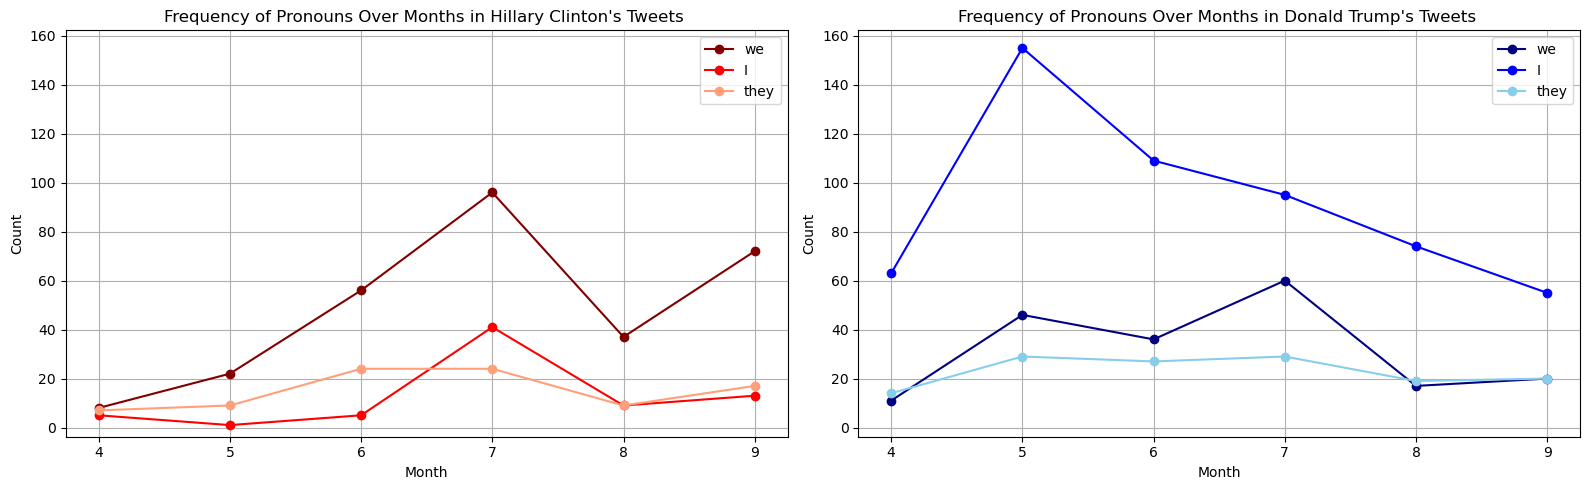

In [38]:
#creating two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
#one for Hillary Clinton's tweets and the frequency of each pronoun group
axs[0].plot(we_count_clinton['month'], we_count_clinton['count'], marker='o', label='we', color = 'maroon')
axs[0].plot(i_count_clinton['month'], i_count_clinton['count'], marker='o', label='I', color = 'red')
axs[0].plot(they_count_clinton['month'], they_count_clinton['count'], marker='o', label='they', color = 'lightsalmon')
axs[0].set_title('Frequency of Pronouns Over Months in Hillary Clinton\'s Tweets ')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
axs[0].legend()
axs[0].grid(True)
# one for Donald Trump's tweets and the frequency of each pronoun group
axs[1].plot(we_count_trump['month'], we_count_trump['count'], marker='o', label='we', color = 'navy')
axs[1].plot(i_count_trump['month'], i_count_trump['count'], marker='o', label='I', color = 'blue')
axs[1].plot(they_count_trump['month'], they_count_trump['count'], marker='o', label='they', color = 'skyblue')
axs[1].set_title('Frequency of Pronouns Over Months in Donald Trump\'s Tweets ')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')
axs[1].legend()
axs[1].grid(True)
#getting the min and max values for y axis
min_val = min(min(axs[0].get_ylim()), min(axs[1].get_ylim()))
max_val = max(max(axs[0].get_ylim()), max(axs[1].get_ylim()))
#setting the y axis to the same values
for ax in axs:
    ax.set_ylim(min_val, max_val)

plt.tight_layout()
plt.savefig('frequency_pronouns_hillary_vs_trump.png')
plt.show()



In [39]:
#defining a function to calculate the ratios of the frequency of pronoun groups in respect to the number of tweets each candidate has per month
#this way the differences between the use of pronouns between candidates can be analyzed in a more accurate manner
def pronoun_frequency_ratio(handle_name, pronoun_list):
    pronoun_count_dict = {"month": [], "ratio": []}
    #using the pronoun_frequency function to get the counts
    pronoun_freq = pronoun_frequency(handle_name, pronoun_list)
    #using the function defined earlier to calculate the number of tweets for handle over the months
    tweet_month = tweets_per_month(handle_name)
    
    for i in range(len(pronoun_freq['count'])):
        #calculating the ratio of pronoun usage to the number of tweets for each month
        ratio = pronoun_freq['count'][i] / tweet_month['n_tweet'][i]
        #appending the month to the pronoun_count_dict
        pronoun_count_dict['month'].append(pronoun_freq['month'][i])
        #appending the ratio to the pronoun_count_dict
        pronoun_count_dict['ratio'].append(ratio)

    return pronoun_count_dict

In [40]:
#using the function for each candidate and for each pronoun list
we_ratio_clinton = pronoun_frequency_ratio("HillaryClinton", we_list)
they_ratio_clinton = pronoun_frequency_ratio("HillaryClinton", they_list)
i_ratio_clinton = pronoun_frequency_ratio("HillaryClinton", i_list)
we_ratio_trump = pronoun_frequency_ratio("realDonaldTrump", we_list)
they_ratio_trump = pronoun_frequency_ratio("realDonaldTrump", they_list)
i_ratio_trump = pronoun_frequency_ratio("realDonaldTrump", i_list)

In [94]:
#defining a function to print the total averages of the provided ratio dictonaries
def get_average(ratio1, ratio2, ratio3):
    ratios = [ratio1, ratio2, ratio3]
    #averages = []
    for i in ratios:
        for month, ratio in i.items():
            total_average = sum(i['ratio']) / len(i['ratio'])
        print(total_average)

In [98]:
get_average(we_ratio_clinton, i_ratio_clinton, they_ratio_clinton)

0.5459613736317664
0.13522262071341032
0.2022357347959132


In [97]:
get_average(we_ratio_trump, i_ratio_trump, they_ratio_trump)

0.19481747667550617
0.6211277684228435
0.15768000610467495


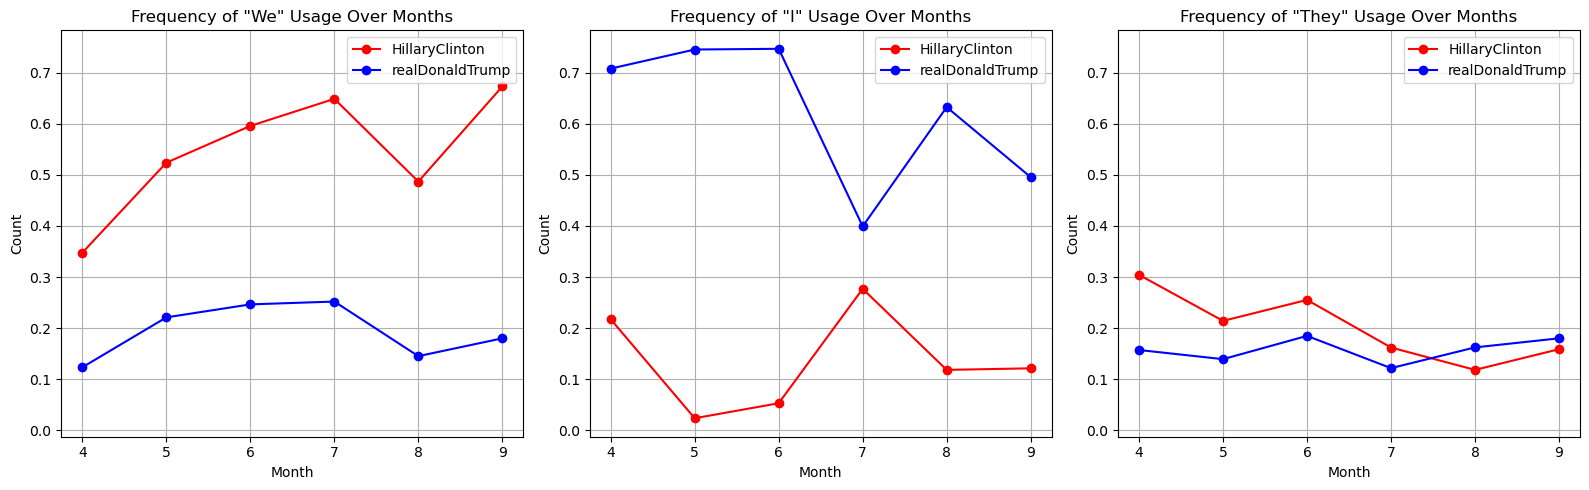

In [35]:
#creating three plots for each pronoun group
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
#we pronoun group ratio for each candidate over the months
axs[0].plot(we_ratio_clinton['month'], we_ratio_clinton['ratio'], marker='o', label='HillaryClinton', color = 'r')
axs[0].plot(we_ratio_trump['month'], we_ratio_trump['ratio'], marker='o', label='realDonaldTrump', color = 'b')
axs[0].set_title('Frequency of "We" Usage Over Months')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
axs[0].legend()
axs[0].grid(True)

#I pronoun group ratio for each candidate over the months
axs[1].plot(i_ratio_clinton['month'], i_ratio_clinton['ratio'], marker='o', label='HillaryClinton', color = 'r')
axs[1].plot(i_ratio_trump['month'], i_ratio_trump['ratio'], marker='o', label='realDonaldTrump', color = 'b')
axs[1].set_title('Frequency of "I" Usage Over Months')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')
axs[1].legend()
axs[1].grid(True)

#they pronoun group ratio for each candidate over the months
axs[2].plot(they_ratio_clinton['month'], they_ratio_clinton['ratio'], marker='o', label='HillaryClinton', color = 'r')
axs[2].plot(they_ratio_trump['month'], they_ratio_trump['ratio'], marker='o', label='realDonaldTrump', color = 'b')
axs[2].set_title('Frequency of "They" Usage Over Months')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Count')
axs[2].legend()
axs[2].grid(True)

#getting the min and max values for y axis
min_val = min(min(axs[0].get_ylim()), min(axs[1].get_ylim()))
max_val = max(max(axs[0].get_ylim()), max(axs[1].get_ylim()))
#setting the y axis to the same values
for ax in axs:
    ax.set_ylim(min_val, max_val)

plt.tight_layout()
plt.savefig('ratio_pronouns_hillary_vs_trump.png')
plt.show()


## Bonus

In [100]:
#defining a function to determine the counts of first, last or both names of their opponents for a given candidate handle.
def opponent_name_preference(handle_name):
    
    if handle_name == 'realDonaldTrump':
        #creating a empty dictionary to store the counts for each name version and the months
        name_count = {'hillary': [], 'clinton': [], 'hillary clinton': [], 'month': []}
        
        for month, month_data in df.groupby('month'):
            handle_data = month_data[month_data['handle'] == handle_name]
            combined_text = ' '.join(handle_data['cleaned_text'].tolist())
            combined_text_tokens = nltk.word_tokenize(combined_text)
            #counting occurrences of individual names
            name_counter = Counter(combined_text_tokens)
            hillary_count = name_counter['hillary']
            clinton_count = name_counter['clinton']
            #counting occurrences of the full name
            hillary_clinton_count = 0
            for i in range(len(combined_text_tokens) - 1):
                if combined_text_tokens[i] == 'hillary' and combined_text_tokens[i+1] == 'clinton':
                    hillary_clinton_count += 1
            
            #appending the counts to the dictionary while substracting the full name count from first and last name only counts
            #this way the count of first and last name only will not include the instances where they occur together
            name_count['hillary'].append(hillary_count - hillary_clinton_count)
            name_count['clinton'].append(clinton_count - hillary_clinton_count)
            name_count['hillary clinton'].append(hillary_clinton_count)
            name_count['month'].append(month)
            
    elif handle_name == 'HillaryClinton':
        name_count = {'donald': [], 'trump': [], 'donald trump': [], 'month': []}
        
        for month, month_data in df.groupby('month'):
            handle_data = month_data[month_data['handle'] == handle_name]
            combined_text = ' '.join(handle_data['cleaned_text'].tolist())
            combined_text_tokens = nltk.word_tokenize(combined_text)
            name_counter = Counter(combined_text_tokens)

            donald_count = name_counter['donald']
            trump_count = name_counter['trump']
            donald_trump_count = 0
            for i in range(len(combined_text_tokens) - 1):
                if combined_text_tokens[i] == 'donald' and combined_text_tokens[i+1] == 'trump':
                    donald_trump_count += 1
            
            name_count['donald'].append(donald_count - donald_trump_count)
            name_count['trump'].append(trump_count - donald_trump_count)
            name_count['donald trump'].append(donald_trump_count)
            name_count['month'].append(month)
    
    return name_count

In [101]:
#using the function for each handle
opponent_name_trump = opponent_name_preference('realDonaldTrump')
opponent_name_clinton = opponent_name_preference('HillaryClinton')

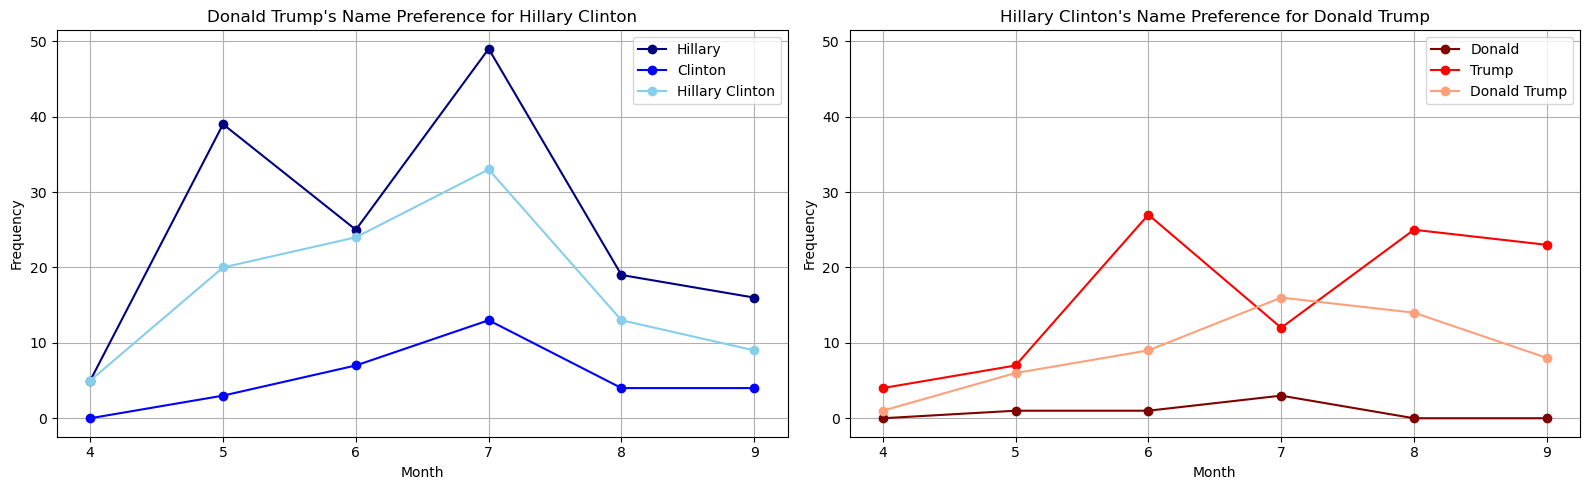

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
#one for Donald Trump's name preference for Hillary Clinton
axs[0].plot(opponent_name_trump['month'], opponent_name_trump['hillary'],label='Hillary', color = 'navy', marker='o')
axs[0].plot(opponent_name_trump['month'], opponent_name_trump['clinton'],label='Clinton', color = 'blue', marker='o')
axs[0].plot(opponent_name_trump['month'], opponent_name_trump['hillary clinton'],label='Hillary Clinton', color = 'skyblue', marker='o')
axs[0].set_title('Donald Trump\'s Name Preference for Hillary Clinton')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].grid(True)

# one for Hillary Clinton's name preference for Donald Trump
axs[1].plot(opponent_name_clinton['month'], opponent_name_clinton['donald'],label='Donald', color = 'maroon', marker='o' )
axs[1].plot(opponent_name_clinton['month'], opponent_name_clinton['trump'],label='Trump', color = 'red', marker='o')
axs[1].plot(opponent_name_clinton['month'], opponent_name_clinton['donald trump'],label='Donald Trump', color = 'lightsalmon', marker='o')
axs[1].set_title('Hillary Clinton\'s Name Preference for Donald Trump')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].grid(True)

#getting the min and max values for y axis
min_val = min(min(axs[0].get_ylim()), min(axs[1].get_ylim()))
max_val = max(max(axs[0].get_ylim()), max(axs[1].get_ylim()))
#setting the y axis to the same values
for ax in axs:
    ax.set_ylim(min_val, max_val)

plt.tight_layout()
plt.savefig('name_preference_hillary_vs_trump.png')
plt.show()

